# 形态学轮廓提取算法

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [6]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2GRAY)

In [15]:
def morcontour_extraction(src):
    dst = np.zeros_like(src)
    rows,cols = src.shape[0],src.shape[1]
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            if src[i-1,j] == 255 and src[i,j] == 255 and \
                src[i+1,j] == 255 and src[i,j-1] == 255 and \
                src[i,j+1] == 255:
                dst[i,j] = 255
            else:
                dst[i,j] = 0
    return dst

In [16]:
binary = np.zeros_like(src)
idx = src >= 120
binary[idx] = 255
binary[~idx] = 0
dst = morcontour_extraction(src)

Text(0.5,1,'DST')

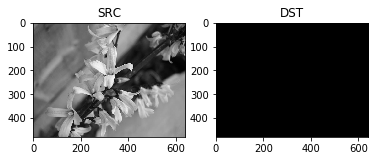

In [17]:
plt.subplot(121)
plt.imshow(src,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('DST')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45267595